In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

In [200]:
csv = pd.read_csv("forestfires.csv")
csv.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [201]:
one_hot_month = pd.get_dummies(csv.month, prefix='month')
one_hot_day = pd.get_dummies(csv.day, prefix='day')

df = pd.concat([csv.drop(["month","day"],axis=1),one_hot_month,one_hot_day],axis=1)
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


X


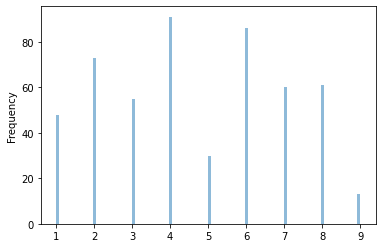

Y


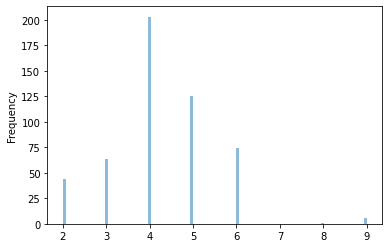

FFMC


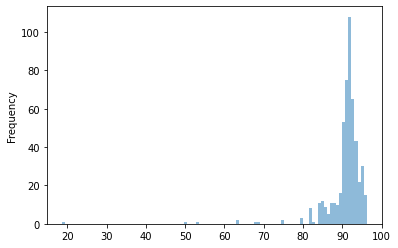

DMC


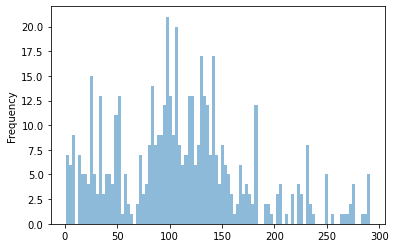

DC


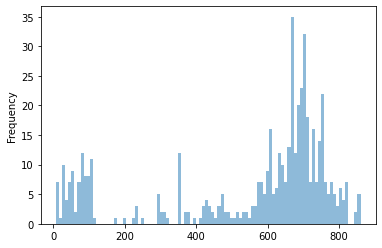

ISI


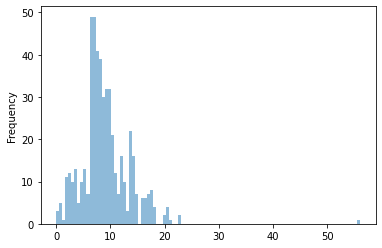

temp


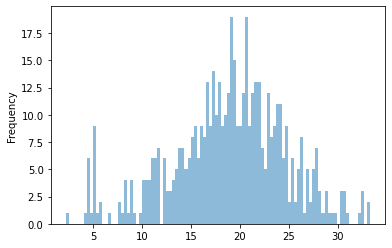

RH


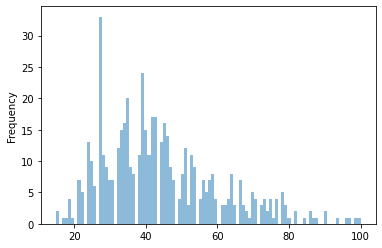

wind


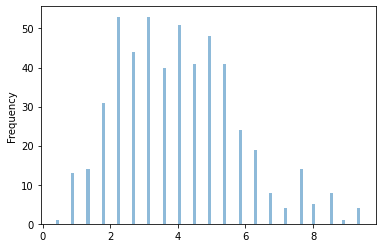

rain


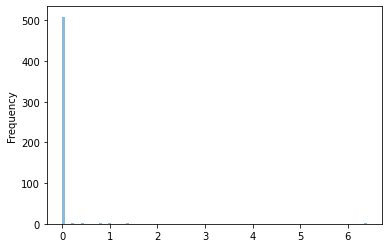

area


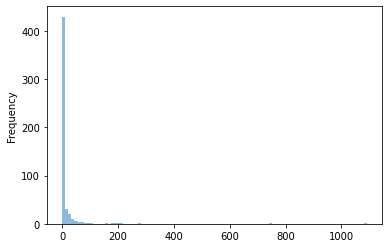

In [202]:
for x in ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain','area']:  
  print(x)
  df[x].plot.hist(bins=100, alpha=0.5)
  plt.show()

In [203]:
for col in ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain','area']:
  df[col] = (df[col]/df.describe()[col]['std'])

In [204]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,2.018018,3.496061,16.420808,1.731123,2.208846,1.978662,3.253037,2.714159,2.242400,0.073197,0.201824,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138
min,0.432194,1.626148,3.387613,0.017175,0.031846,0.000000,0.378878,0.919260,0.223258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.296581,3.252296,16.340252,1.071097,1.764448,1.425602,2.669365,2.022372,1.506989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.728774,3.252296,16.593870,1.690959,2.677511,1.842316,3.323789,2.573929,2.232576,0.000000,0.008169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.025355,4.065370,16.829372,2.223385,2.877861,2.368693,3.926549,3.248053,2.734905,0.000000,0.103211,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.889743,7.317666,17.427186,4.548259,3.469235,12.304042,5.734828,6.128401,5.246553,21.624608,17.136532,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [205]:
X = df.drop(['area'],axis=1)
y = df.area

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
len(X_train),len(X_test)

(346, 171)

In [215]:
def make_model(input_len,output_len,model_summary=True):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(input_len,activation=None,input_shape=[input_len]))
  model.add(tf.keras.layers.Dense(20*input_len,activation=None))
  model.add(tf.keras.layers.Dense(int(15*input_len),activation=None))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Dense(int(15*input_len),activation=None))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Dense(int(15*input_len),activation=None))
  model.add(tf.keras.layers.Dense(output_len,activation=None))

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['accuracy'])

  if model_summary:
    model.summary()

  return model

In [207]:
in_size = len(X_train.columns)

In [216]:
model = make_model(in_size,1,model_summary=True)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 29)                870       
_________________________________________________________________
dense_65 (Dense)             (None, 580)               17400     
_________________________________________________________________
dense_66 (Dense)             (None, 435)               252735    
_________________________________________________________________
dropout (Dropout)            (None, 435)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 435)               189660    
_________________________________________________________________
dropout_1 (Dropout)          (None, 435)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 435)             

In [217]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [218]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
11/11 [==============================] - 0s 30ms/step - loss: 1053.7924 - accuracy: 0.1647 - val_loss: 2.0548 - val_accuracy: 0.4503
Epoch 2/100
11/11 [==============================] - 0s 17ms/step - loss: 1.9792 - accuracy: 0.3006 - val_loss: 2.0843 - val_accuracy: 0.5029
Epoch 3/100
11/11 [==============================] - 0s 21ms/step - loss: 1.4969 - accuracy: 0.3064 - val_loss: 1.9992 - val_accuracy: 0.5029
Epoch 4/100
11/11 [==============================] - 0s 22ms/step - loss: 1.6618 - accuracy: 0.3295 - val_loss: 2.5067 - val_accuracy: 0.0000e+00
Epoch 5/100
11/11 [==============================] - 0s 16ms/step - loss: 6.6234 - accuracy: 0.2919 - val_loss: 1.9895 - val_accuracy: 0.5029
Epoch 6/100
11/11 [==============================] - 0s 17ms/step - loss: 0.8209 - accuracy: 0.3526 - val_loss: 1.9876 - val_accuracy: 0.5029
Epoch 7/100
11/11 [==============================] - 0s 18ms/step - loss: 1.7048 - accuracy: 0.2861 - val_loss: 1.9547 - val_accuracy: 0.4561